<a href="https://colab.research.google.com/github/noorilu/csc413/blob/main/csc413_hw01_202601_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC413 Homework 1 - Regression

Implement linear regression (section 1) and softmax regression (section 2) from scratch in this notebook.

Complete only the code cells marked with `## TODO`. Edit only the parts between `#########`

Editing the Notebook
*   To make changes, select either: `File > Download` or `File > Save a copy in Drive`.

*   Replace the `## Your Code` section with your implementation.

Submission Instructions

*   When finished, download your notebook as a Python file: `File > Download > Download .py`.
*   Submit BOTH `.ipynb` and `.py` on MarkUs.

**Notebook Version:** 1.0

If the notebook is updated, a new version will be listed below.

- version 1.0: Initial release

# Set-up

This code below sets up the environment for our work. We’ll use NumPy for math with arrays, Matplotlib for plots, and fix the random seed so results are reproducible.

In [ ]:
# ========================================================
# DO NOT MODIFY THIS CODE CELL.
# ========================================================

import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Callable, Literal

SEED = 42
np.random.seed(SEED)

This function below creates a synthetic dataset. It generates 1,000 evenly spaced points x between 0 and 1, adds noise eps, and computes y from a linear relationship with a small “bump” between 0.75 and 0.8.

In [ ]:
# ========================================================
# DO NOT MODIFY THIS CODE CELL.
# ========================================================

def generate_data():
    size = 1000
    x = np.linspace(0, 1, size)
    eps = np.random.normal(loc=0, scale=0.1, size=size)
    y = -10 * x + 5 + eps
    y += 15 * np.logical_and(x > 0.75, x < 0.8).astype(float)
    return x, y

# Linear Regression

In this section, you will impelment a basic linear regression model to fit the synthetic dataset using gradient descent.

## Visualize Data

Run the code below to plot the dataset as a scatter plot.

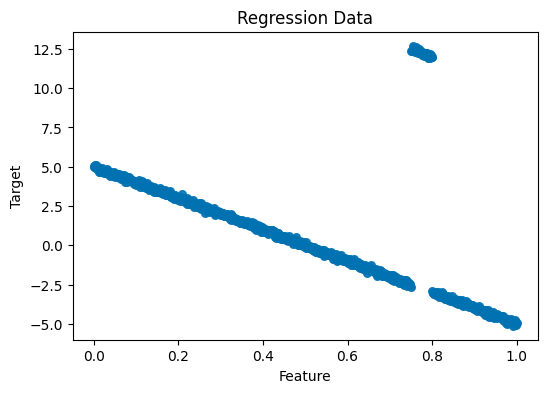

In [ ]:
# ========================================================
# DO NOT MODIFY THIS CODE CELL.
# ========================================================

def visualize_data(x, y):
    '''
    Create a scatter plot of the data using a colorblind-friendly palette.
    Handles both 1D (regression-style) and 2D+ (classification-style) inputs.
    '''

    # Okabe–Ito colorblind-friendly palette
    okabe_ito = [
        "#0072B2",  # blue
        "#E69F00",  # orange
        "#009E73",  # green
        "#CC79A7",  # magenta
        "#56B4E9",  # sky blue
        "#D55E00",  # vermillion
        "#F0E442",  # yellow
        "#000000",  # black
    ]

    fig, ax = plt.subplots(figsize=(6, 4))

    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    ax.set_title("Regression Data")

    return fig, ax

np.random.seed(SEED)
inputs, targets = generate_data()
fig, ax = visualize_data(inputs, targets)

## Linear Regression with L2 Loss

Implement a simple linear regression model using gradient descent to fit the synthetic data using gradient descent.

Your code can only use `numpy` to implement the gradients. It cannot use any autograd tools (PyTorch, TensorFlow, MXNet, JAX, etc.).

**Model:**
$$
{\hat y} = w \cdot x + b, \tag{model}
$$
where ${\hat y} \in \mathbb R$ is the prediction, $x \in \mathbb R$ is the input, $w \in \mathbb R$ is the weight parameter, and $b \in \mathbb R$ is the bias parameter.

**Objective:**

The objective is to minimize the mean squared error (MSE) between predictions and targets. This is also called the L2 loss.

$$L(w,b) = \frac 1 {2N} \sum_{i=1}^N \left(y_i-\hat y_i\right)^2\tag{mse}$$


**Updates:** Gradient descent will iteratively update the parameters in the direction of the negative gradient, where

$$w_t \gets w_{t-1} - \eta \, \nabla_{w_{t-1}} L \tag{weight update}$$

$$b_t \gets b_{t-1} - \eta \, \nabla_{b_{t-1}} {L} \tag{bias update}$$


Complete the function below to compute the **predictions for a batch of $N$ inputs** given the weight and bias parameters.

Recall that the formula to compute the prediction for one example is:
$${\hat y} = w \cdot x + b$$

In [ ]:
def model(weight: float, bias: float, inputs: np.array) -> np.array:
    '''
    Compute the predictions for a batch of inputs
    given the weight and bias parameters.

    Parameters:
      inputs: np.array of shape (N,) – batch of features
      weight: float – scalar weight
      bias:   float – scalar bias

    Returns:
      pred: np.array of shape (N,) – predictions
    '''
    ##########################################
    # TODO
    ##########################################
    return pred

Complete the function below to compute the **mean squared loss** for a batch of $N$ inputs.

$${L}(w,b) = \frac {1}{2N} \sum_{i=1}^N \left( y_i-\hat y_i \right)^2$$

In [ ]:
def loss(weight: float, bias: float, inputs: np.array,
         targets: np.array) -> float:
    '''
    Implement mean squared error loss

    Parameters:
      inputs:  np.array of shape (N,) – batch of features
      targets: np.array of shape (N,) – true values
      weight:  float – scalar weight
      bias:    float – scalar bias

    Returns:
      res: float – mean squared error (MSE) value
    '''
    ##########################################
    ## TODO
    ##########################################
    return res

Derive the derivative of the L2 loss with respect to the $i$-th prediction ${\hat y_i}$.

$$\frac {\partial {L}}{\partial \hat y_i } = \text{TODO} $$


Then, derive the gradient of the L2 loss with respect to the prediction vector $\mathbf{\hat y}$.

$$\frac {\partial {L}}{\partial \mathbf{\hat y} } = \text{TODO} $$


Then, complete the function below to compute this gradient vector.

In [ ]:
def dloss_dmodel(weight: float, bias: float, inputs: np.array,
                 targets: np.array) -> np.array:
    '''
    Compute the derivative of the loss function
    with respect to the predictions.

    Parameters:
        inputs (np.array of shape (N,)): batch of features
        targets (np.array of shape (N,)): true values
        weight (float): scalar weight
        bias (float): scalar bias

    Returns:
        res (np.array of shape (N,)): gradient of the loss
            with respect to each prediction
    '''
    ##########################################
    ## TODO
    N = inputs.size
    ##########################################
    return res

Derive the gradient of the loss function with respect to the weight parameter. This is also the update for the weight parameter in gradient descent. Make sure that you final expression is vectorized and contains no summations. Your expressions should make use of the previous results ($\frac {\partial {L}}{\partial \hat y_i }$ or $\frac {\partial {L}}{\partial \mathbf{\hat y} }$) without recomputing them.

$$ \frac {\partial {L}}{\partial w} = \text{TODO} $$


Then, complete the function below to compute this gradient vector. Your function should make use of the result of `dloss_dmodel` without recomputing it.

In [ ]:
def weight_update(weight: float, bias: float, inputs: np.array,
                  targets: np.array) -> float:

    '''
    Compute the gradient of the loss function
    with respect to the weight parameter.

    Parameters:
        inputs (np.array of shape (N,)): batch of features
        targets (np.array of shape (N,)): true values
        weight (float): scalar weight
        bias (float): scalar bias

    Returns:
        res (float): gradient of the loss with respect to the weight

    Usage:
        This function is used in gradient descent updates:
        weight ← weight - learning_rate * weight_update(...)
    '''

    ##########################################
    ## TODO
    ##########################################
    return res

Derive the gradient of the loss function with respect to the bias parameter. This is also the update for the bias parameter in gradient descent. Your expressions should make use of the previous results ($\frac {\partial {L}}{\partial \hat y_i }$ or $\frac {\partial {L}}{\partial \mathbf{\hat y} }$) without recomputing them.

$$ \frac {\partial {L}}{\partial b} = \text{TODO} $$


Then, complete the function below to compute this gradient vector. Your function should make use of the result of `dloss_dmodel` without recomputing it.

In [ ]:
def bias_update(weight: float, bias: float, inputs: np.array,
                targets: np.array) -> float:

    '''
    Compute the gradient of the loss function
    with respect to the bias parameter.

    Parameters:
        inputs (np.array of shape (N,)): batch of features
        targets (np.array of shape (N,)): true values
        weight (float): scalar weight
        bias (float): scalar bias

    Returns:
        res (float): gradient of the loss with respect to the bias

    Usage:
        This function is used in gradient descent updates:
        bias ← bias - learning_rate * bias_update(...)
    '''

    ##########################################
    ## TODO
    ##########################################
    return res

The function below trains a linear regressin model using gradient descent.

In [ ]:
# ========================================================
# DO NOT MODIFY THIS CODE CELL.
# BUT YOU NEED TO UNDERSTAND IT!
# ========================================================

def train_linear_regression(inputs: np.array, targets: np.array,
                            weight: float, bias: float,
                            learning_rate: float,
                            update_steps: int = 1000) \
                            -> Tuple[float, float, List[float]]:

    '''
    Train a simple linear regression model using gradient descent.

    Parameters:
        inputs (np.array of shape (N,)): batch of features
        targets (np.array of shape (N,)): true target values
        weight (float): initial scalar weight
        bias (float): initial scalar bias
        learning_rate (float): step size for gradient descent updates
        update_steps (int, default=1000): number of iterations to run

    Returns:
        weight (float): updated weight after training
        bias (float): updated bias after training
        losses (List[float]): list of loss values recorded at each step
    '''

    losses = []
    for _ in range(update_steps):
        new_weight = weight - \
            learning_rate*weight_update(weight, bias, inputs, targets)
        new_bias = bias - \
            learning_rate*bias_update(weight, bias, inputs, targets)
        weight = new_weight
        bias = new_bias
        losses.append(loss(weight, bias, inputs, targets))
    return weight, bias, losses

Train your model and print the learned values of $w$ and $b$. Compare them to the ground-truth values defined in `generate_data`. Check if your final MSE loss is below **5.2**. If not, adjust `learning_rate` and `update_steps` until you achieve this.  

**Graded Task **

**Report your final hyperparameters and loss below:**

* final `learning_rate` = TODO
* final `update_steps` = TODO
* final loss (with 2 decimal places) = TODO

New weight after training: -7.200127316267307
New bias after training: 4.3408790528218235
Final loss: 5.1042263628324465


Text(0, 0.5, 'Loss')

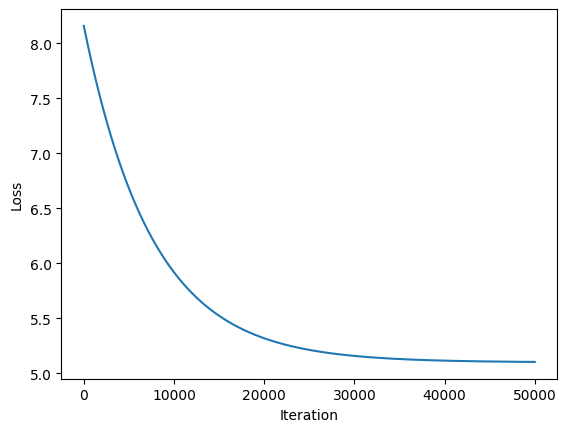

In [ ]:
# ========================================================
# Train your linear regression model
# ========================================================
# In this cell, you will experiment with the learning rate
# and the number of update steps to minimize the loss.
# Your goal: achieve a final MSE loss < 5.2.
#
# Do NOT change the initial values of weight or bias.
# Only modify learning_rate and update_steps inside the TODO block.
# ========================================================

## Don't change initial parameters
weight = 1.
bias = 0.

# Update the parameters (learning_rate and update_steps) below
#so that your model achieves < 5.2 MSE loss
#########################################
## TODO:
learning_rate = None
update_steps = None
##########################################

new_weight, new_bias, losses = train_linear_regression(inputs, targets,
                                                       weight, bias,
                                                       learning_rate,
                                                       update_steps)
print(f"New weight after training: {new_weight}")
print(f"New bias after training: {new_bias}")
print(f"Final loss: {losses[-1]}")
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")

Complete the function below to recreate your scatter plot of the dataset and add the model’s predictions as a line on the same plot.  

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'y = -7.20 x + 4.34'}>)

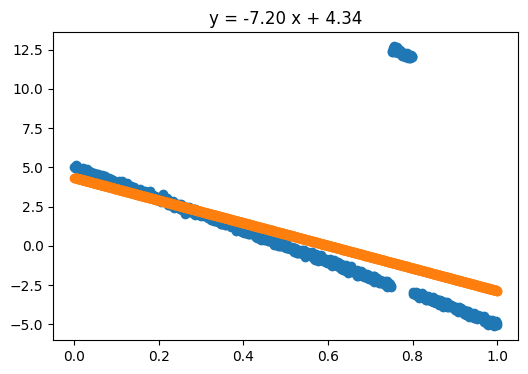

In [ ]:
# ========================================================
# DO NOT MODIFY THIS CODE CELL.
# ========================================================

def plot_model_prediction(x, y):
    '''
    Plot the true data points and the model’s predicted line.

    Parameters:
        x (np.array): input features
        y (np.array): target values

    Returns:
        fig, ax: matplotlib figure and axis objects for further customization
    '''
    fig, ax = plt.subplots(figsize=(6, 4))

    # Create a scatter plot of the data
    ##########################################
    ## TODO
    ##########################################

    # Create a scatter plot of the predicted values
    ##########################################
    ## TODO
    ##########################################

    ax.set_title(f"y = {new_weight:.2f} x + {new_bias:.2f}")

    return fig, ax


plot_model_prediction(inputs,targets)

Describe how the fitted line behaves in the presence of outliers. Does the fitted line follow the main trend or get pulled toward the outliers? How does the loss function lead to this behavior? Briefly describe your observations and reasoning below.

TODO:


## **Robust** Linear Regression with L1 Loss

Complete a series of functions below to implement a linear regression model with **the L1 loss (absolute difference)** instead of the L2 loss (MSE). You should be able to copy and paste your code from the previous parts and only change a few lines.

Complete the function below to compute the predictions for a batch of N inputs given the weight and bias parameters. This function should be identical to the corresponding function in the previous part.

Recall that the formula to compute the prediction for one example is:
$${\hat y} = w \cdot x + b$$

In [ ]:
def robust_lr_model(weight: float, bias: float, inputs: np.array) -> np.array:
    '''
    Compute the predictions of a simple linear regression model.

    Parameters:
        weight (float): scalar weight parameter
        bias (float): scalar bias parameter
        inputs (np.array of shape (N,)): batch of input features

    Returns:
        res (np.array of shape (N,)): predicted outputs for each input
    '''
    ##########################################
    ## TODO
    ##########################################
    return res

Complete the function below to compute the average L1 loss for a batch of N inputs.

$${L} = \frac{1}{N} \sum_{i=1}^N \lvert \hat y_i - y_i \rvert$$

In [ ]:
def robust_lr_loss(weight: float, bias: float, inputs: np.array,
                   targets: np.array) -> float:
    '''
    Compute the L1 loss (mean absolute error) for a linear regression model.

    Parameters:
        weight (float): scalar weight parameter
        bias (float): scalar bias parameter
        inputs (np.array of shape (N,)): batch of input features
        targets (np.array of shape (N,)): true target values

    Returns:
        res (float): mean absolute difference between predictions and targets
    '''
    ##########################################
    ## TODO
    ##########################################
    return res

Derive the derivative of the L1 loss with respect to the $i$-th prediction ${\hat y_i}$.

$$\frac {\partial {L}}{\partial \hat y_i } = \text{TODO} $$


Then, derive the gradient of the L1 loss with respect to the prediction vector $\mathbf{\hat y}$.

$$\frac {\partial {L}}{\partial \mathbf{\hat y} } = \text{TODO} $$


Then, complete the function below to compute this gradient vector.

In [ ]:
def robust_lr_dloss_dmodel(weight: float, bias: float, inputs: np.array,
                           targets: np.array) -> np.array:
    '''
    Compute the derivative of the L1 loss function
    with respect to the model output (predictions).

    Parameters:
        weight (float): scalar weight parameter
        bias (float): scalar bias parameter
        inputs (np.array of shape (N,)): batch of input features
        targets (np.array of shape (N,)): true target values

    Returns:
        res (np.array of shape (N,)): derivative of the loss
            with respect to each model prediction
    '''
    ##########################################
    ## TODO
    ##########################################
    return res

Derive the gradient of the loss function with respect to the weight parameter. This expression should be identical to the corresponding expression in the previous section.

$$ \frac {\partial {L}}{\partial w} = \text{TODO} $$


Then, complete the function below to compute this gradient vector.

In [ ]:
def robust_lr_weight_update(weight: float, bias: float, inputs: np.array,
                            targets: np.array) -> float:
    '''
    Compute the gradient of the L1 loss with respect to the weight parameter.

    Parameters:
        weight (float): scalar weight parameter
        bias (float): scalar bias parameter
        inputs (np.array of shape (N,)): batch of input features
        targets (np.array of shape (N,)): true target values

    Returns:
        res (float): gradient of the L1 loss with respect to the weight
    '''
    ##########################################
    ## TODO
    ##########################################
    return res

Derive the gradient of the loss function with respect to the bias parameter. This expression should be identical to the corresponding expression in the previous section.

$$ \frac {\partial {L}}{\partial b} = \text{TODO} $$


Then, complete the function below to compute this gradient vector.

In [ ]:
def robust_lr_bias_update(weight: float, bias: float, inputs: np.array,
                          targets: np.array) -> float:
    '''
    Compute the gradient of the L1 loss with respect to the bias parameter.

    Parameters:
        weight (float): scalar weight parameter
        bias (float): scalar bias parameter
        inputs (np.array of shape (N,)): batch of input features
        targets (np.array of shape (N,)): true target values

    Returns:
        res (float): gradient of the L1 loss with respect to the bias
    '''
    ##########################################
    ## TODO
    ##########################################
    return res

The function below trains a linear regressin model using gradient descent.

In [ ]:
# ========================================================
# DO NOT MODIFY THIS CODE CELL.
# BUT YOU NEED TO UNDERSTAND IT!
# ========================================================

def train_robust_linear_regression(inputs: np.array, targets: np.array,
                                   weight: float, bias: float,
                                   learning_rate: float,
                                   update_steps: int = 1000) \
                                   -> Tuple[float, float, List[float]]:

    '''
    Train a linear regression model with L1 loss (robust regression)
    using gradient descent.

    Parameters:
        inputs (np.array of shape (N,)): batch of input features
        targets (np.array of shape (N,)): true target values
        weight (float): initial scalar weight
        bias (float): initial scalar bias
        learning_rate (float): step size for gradient descent
        update_steps (int, default=1000): number of training iterations

    Returns:
        weight (float): updated weight after training
        bias (float): updated bias after training
        losses (List[float]): list of loss values recorded at each iteration
    '''

    losses = []
    for _ in range(update_steps):
        new_weight = weight - learning_rate*robust_lr_weight_update(
            weight, bias, inputs, targets)
        new_bias = bias - learning_rate*robust_lr_bias_update(
            weight, bias, inputs, targets)
        weight = new_weight
        bias = new_bias
        losses.append(robust_lr_loss(weight, bias, inputs, targets))
    return weight, bias, losses

Train your model and print the learned values of $w$ and $b$. Compare them to the ground-truth values defined in `generate_data`. Check if your final MSE loss is below **1.5**. If not, adjust `learning_rate` and `update_steps` until you achieve this.  

Plot the model as a line again. Why do you think the behavior is different?

Report your final hyperparameters and loss below:

* final `learning_rate` = TODO
* final `update_steps` = TODO
* final loss (with 2 decimal places) = TODO

New weight after training: -9.97065777777566
New bias after training: 4.992862000000691
Final loss: 0.8242583282194875


Text(0, 0.5, 'Loss')

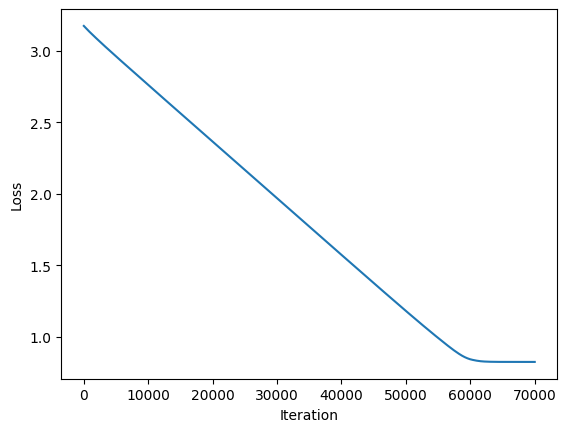

In [ ]:
# ========================================================
# Train your robust linear regression model (with L1 loss)
# ========================================================
# In this cell, you will experiment with different values of
# `robust_lr_learning_rate` and `robust_lr_update_steps`
# to achieve a final L1 loss below 1.5.
# ========================================================

# Initial parameters (do not change)
weight = 1.
bias = 0.

## Play around with different learning_rate
## and update_steps combinations
## so that your model achieves <1.5 L1 loss
##########################################
## TODO
robust_lr_learning_rate = None
robust_lr_update_steps = None
##########################################

# Train the robust linear regression model using L1 loss
robust_lr_new_weight, robust_lr_new_bias, robust_lr_losses = \
    train_robust_linear_regression(inputs, targets,
                                   weight, bias,
                                   robust_lr_learning_rate,
                                   robust_lr_update_steps)

# Display the learned parameters and final loss
print(f"New weight after training: {robust_lr_new_weight}")
print(f"New bias after training: {robust_lr_new_bias}")

# Compute and print the final L1 loss
final_loss=robust_lr_loss(robust_lr_new_weight, robust_lr_new_bias,
                          inputs, targets)
print(f"Final loss: {final_loss}")

# Plot the loss curve to visualize convergence
plt.plot(robust_lr_losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")

Run the function below to generate plots of the data and the fitted line.

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'y = -9.97x + 4.99'}, xlabel='x', ylabel='y'>)

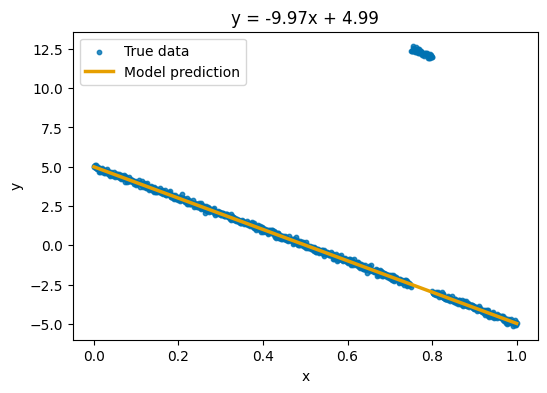

In [ ]:
def plot_robust_lr_model_prediction(x, y):
    '''
    Plot the true data points and the model’s predicted line.

    Parameters:
        x (np.array): input features
        y (np.array): target values

    Returns:
        fig, ax: matplotlib figure and axis objects for further customization
    '''
    # Okabe–Ito colorblind-friendly palette
    okabe_ito = {
        "blue": "#0072B2",
        "orange": "#E69F00",
        "green": "#009E73",
        "pink": "#CC79A7",
        "sky": "#56B4E9",
        "vermillion": "#D55E00",
        "yellow": "#F0E442",
        "black": "#000000"
    }

    fig, ax = plt.subplots(figsize=(6, 4))

    # Scatter true data points
    ax.scatter(x, y, color=okabe_ito["blue"],
               label="True data", alpha=0.8, s=10)

    # Predicted values from robust LR model
    preds = robust_lr_model(robust_lr_new_weight, robust_lr_new_bias, x)

    # Sort x for a smooth line plot
    sorted_idx = np.argsort(x)
    ax.plot(x[sorted_idx], preds[sorted_idx],
            color=okabe_ito["orange"], linewidth=2.5,
            label="Model prediction")

    ax.set_title(f"y = {robust_lr_new_weight:.2f}x + {robust_lr_new_bias:.2f}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend()
    ax.grid(False)

    return fig, ax


plot_robust_lr_model_prediction(inputs, targets)

Describe how the fitted line behaves in the presence of outliers. Does the fitted line follow the main trend or get pulled toward the outliers? How does the loss function lead to this behavior? **Briefly describe your observations and reasoning below.**

TODO:


# Softmax Regression

In the second part of the homework, you will implement softmax regression.

## Generating Flower-Shaped Dataset

This code below generates a synthetic flower-shaped dataset for classification.  

Each point is placed around petal-like regions using polar coordinates with added noise, and a class label is assigned based on the angle. The function returns shuffled feature points `X` (shape: \((n, 2)\)) and their corresponding class labels `y`.  

In [ ]:
# ========================================================
# DO NOT MODIFY THIS CODE CELL.
# ========================================================

import numpy as np
from sklearn.utils import shuffle

def generate_flower_data(n_samples: int = 1000, noise: float = 0.1,
                         num_classes: int = 3, seed: int = 42):
    rand = np.random.default_rng(seed)
    t = rand.uniform(0, 2 * np.pi, n_samples)

    # Petal shape: radius varies with class count
    r = 1 + 0.3 * np.sin(num_classes * t)

    x = r * np.cos(t) + noise * rand.standard_normal(n_samples)
    y = r * np.sin(t) + noise * rand.standard_normal(n_samples)

    X = np.stack([x, y], axis=1)

    # Assign class based on petal angle region
    labels = ((t % (2 * np.pi)) / (2 * np.pi) * num_classes).astype(int)
    y = labels.reshape(-1, 1)

    return shuffle(X, y, random_state=seed)

NUM_CLASSES = 4
N_FEATURES = 2
np.random.seed(SEED)
flower_X, flower_y = generate_flower_data(num_classes=NUM_CLASSES)

The function below plots the generated flower-shaped dataset. Each point is shown in 2D, with colors representing the different class labels.  

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Flower Dataset'}>)

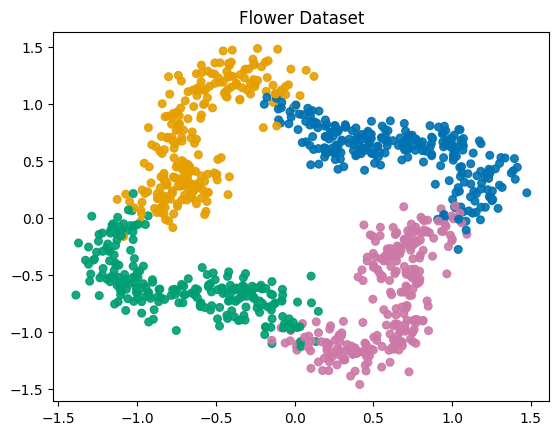

In [ ]:
# ========================================================
# DO NOT MODIFY THIS CODE CELL.
# ========================================================

def visualize_classification_data(features, labels):
    # Okabe–Ito colorblind-friendly palette
    okabe_ito = [
        "#0072B2",  # blue
        "#E69F00",  # orange
        "#009E73",  # green
        "#CC79A7",  # magenta
        "#56B4E9",  # sky blue
        "#D55E00",  # vermillion
        "#F0E442",  # yellow
        "#000000",  # black
    ]

    fig, ax = plt.subplots()

    # Map label indices to color palette
    colors = [okabe_ito[int(lbl) % len(okabe_ito)] for lbl in labels.ravel()]

    ax.scatter(features[:, 0], features[:, 1], c=colors, s=30, alpha=0.9)
    plt.title('Flower Dataset')

    return fig, ax


visualize_classification_data(flower_X, flower_y)

## Implement Softmax Regression

Implement a softmax regression model using gradient descent to fit the synthetic flower-like data.

Your code cannot use any autograd tools (PyTorch, TensorFlow, MXNet, JAX, etc.).

**Model:**
In classification problems the goal is to assign each data point to one of the $k$ possible classes. In softmax regression, we model this by predicting a probability distribution over $k$ classes for each sample. Given an input $x \in \mathbb R^d$, the model computes class probabilities as:

$$ \mathbf{\hat y} = \mathrm{softmax} (\mathbf{W} \mathbf{x} + \mathbf{b})$$

The softmax function maps the output logits $\mathbf{o}=Wx+b \in \mathbb R^k$ to a valid probability distribution:

$$ \mathrm{softmax}(\mathbf{o})_y = \frac{\exp(o_y)}{\sum_{j=1}^k \exp(o_j)}$$

where
- $\mathbf{\hat y}\in\mathbb{R}^k$ is the predicted class probabilities
- $W\in \mathbb{R}^{k\times d}$ is the weight matrix
- $b\in\mathbb{R}^k$ is the bias vector
- $k$ is the number of classes

Remember the softmax function ensures that the model outputs a probability distribution (values in $[0, 1]$ and sum up to 1).

**Objective:** Minimize the cross-entropy loss between predictions and one-hot encoded targets.

$${L}(\mathbf{W},b) = -\frac 1 {n} \sum_{i=1}^n \sum_{j=1}^k y_{ij} \log (\hat y_{ij})$$
where $y\in\mathbb R ^{n\times k}$ is the one-hot encoded label matrix, and $\hat y\in\mathbb R^{n\times k}$ are the predicted probabilities.

**Updates:** Remember our goal is to find parameters $(W^\ast, b^\ast)$ that minimize the objective function.
In gradient descent we iteratively update the parameters in the direction of the negative gradient, where

$$w_t \gets W_{t-1} - \eta \nabla_{W_{t-1}}  L$$
$$b_t \gets b_{t-1} - \eta \nabla_{b_{t-1}}  L$$


Implement the softmax function below.
$$ \mathrm{softmax}(\mathbf{o})_y = \frac{\exp(o_y)}{\sum_{j=1}^k \exp(o_j)}$$

In [ ]:
def softmax(logits: np.array) -> np.array:
    """
    Compute the softmax of a batch of logits.

    Parameters
    ----------
    logits : np.ndarray of shape (N, K)
        Input matrix of raw scores (N examples, K classes).

    Returns
    -------
    res : np.ndarray of shape (N, K)
        Softmax probabilities for each example, row-normalized so that
        each row sums to 1.
    """

    # Implement the softmax function below
    # Hint: Pass keepdims=True
    ##########################################
    ## TODO
    ##########################################

    # Sanity check: softmax output must have same shape as logits (N, K)
    assert logits.shape == res.shape
    return res

The softmax model output is:
$$\mathbf{\hat Y} = \text{softmax} (\mathbf{X} \mathbf{W}^{\top}  + \mathbf{b})$$

In [ ]:
def logistic_reg_model(weight: np.ndarray, bias:np.ndarray,
                       inputs: np.ndarray) -> np.ndarray:
    '''
    Compute softmax probabilities for a batch of inputs.

    Parameters
    ----------
    weight : np.ndarray of shape (K, D)
        Weight matrix, one row per class (K classes, D features).
    bias : np.ndarray of shape (K,)
        Bias vector, one entry per class.
    inputs : np.ndarray of shape (N, D)
        Batch of N data points, each with D features.

    Returns
    -------
    probs : np.ndarray of shape (N, K)
        Predicted class probabilities for each of the N inputs.
    '''

    ##########################################
    ## TODO
    ##########################################

    assert probs.shape == (inputs.shape[0], weight.shape[0])
    return probs

The cross entropy loss function is:

$${L}(W,b) = -\frac 1 {n} \sum_{i=1}^n \sum_{j=1}^k y_{ij} \log (\hat y_{ij})$$

In [ ]:
def cross_entropy_loss(predicted_probs: np.array, targets: np.array) -> float:

    '''
    Compute the cross-entropy loss for multi-class classification.

    Parameters:
        predicted_probs (np.array of shape (N, C)): predicted class probabilities
        targets (np.array of shape (N, C)): one-hot encoded true class labels

    Returns:
        loss (float): average cross-entropy loss across all samples
    '''

    N, c = predicted_probs.shape

    ## Hint: You can add a small offset (eps) for numerical stability
    ## to avoid taking log(0)
    eps = 1e-7

    # Sanity checks to ensure inputs are valid probabilities and shapes match
    assert predicted_probs.shape == targets.shape
    np.testing.assert_allclose(np.sum(predicted_probs, axis=1), 1, rtol=1e-5)

    ##########################################
    ## TODO
    ##########################################

    # Final check: the function should return a scalar float
    assert isinstance(loss, float), "CE should return a scalar value."
    return loss

The gradient of the cost function with respect to the logits is

$$\frac {\partial {L}}{\partial \mathbf{o}} = \frac{1}{N} (\mathbf{\hat y} - \mathbf{y})$$

In [ ]:
def dloss_dlogits(predicted_probs: np.ndarray, targets: np.ndarray) \
                  -> np.ndarray:
    '''
    Compute the gradient of the cross-entropy cost function
    with respect to the logits.

    Parameters
    ----------
    predicted_probs : np.ndarray of shape (N, K)
        Softmax probabilities for N examples and K classes.
    targets : np.ndarray of shape (N, K)
        One-hot encoded true labels for N examples.

    Returns
    -------
    grad : np.ndarray of shape (N, K)
        Gradient of the cost with respect to the logits for each example.
    '''

    ##########################################
    ## TODO
    ##########################################
    assert grad.shape == predicted_probs.shape
    return grad

The update for the weight parameter is:

$$ \frac {\partial {L}}{\partial w} = \sum_{i=1}^N \frac {\partial {L}}{\partial \hat y_i} x_i $$

In [ ]:
def logistic_reg_weight_update(predicted_probs: np.ndarray,
                               inputs: np.ndarray,
                               targets: np.ndarray) -> np.ndarray:
    '''
    Compute the gradient of the cross-entropy loss with respect
    to the weight matrix in softmax regression.

    Parameters:
        predicted_probs (np.ndarray): predicted class probabilities,
                                      shape (N, C)
        inputs (np.ndarray): input features, shape (N, D)
        targets (np.ndarray): one-hot encoded true labels, shape (N, C)

    Returns:
        dW (np.ndarray): gradient of the loss with respect to the weights,
                         shape (C, D)
    '''

    ##########################################
    ## TODO:
    ##########################################
    return dW

The update for the bias parameter is

$$ \frac {\partial {L}}{\partial b} = \sum_{i=1}^N \frac {\partial {L}}{\partial \hat y_i} $$

In [ ]:
def logistic_reg_bias_update(predicted_probs: np.ndarray,
                             inputs: np.ndarray,
                             targets: np.ndarray) -> np.ndarray:
    '''
    Compute the gradient of the cross-entropy loss with respect
    to the bias term in softmax regression.

    Parameters:
        predicted_probs (np.ndarray): predicted class probabilities,
                                      shape (N, C)
        inputs (np.ndarray): input features, shape (N, D)
        targets (np.ndarray): one-hot encoded true labels, shape (N, C)

    Returns:
        db (np.ndarray): gradient of the loss with respect to the bias,
                         shape (C,)

    '''
    ##########################################
    ## TODO
    ##########################################
    return db

In [ ]:
# ========================================================
# DO NOT MODIFY THIS CODE CELL
# BUT YOU SHOULD UNDERSTAND IT
# ========================================================

def train_logistic_regression(inputs: np.array, targets: np.array,
                              weight: np.ndarray,
                              bias: np.ndarray,
                              learning_rate: float,
                              update_steps: int = 1000) \
                              -> Tuple[np.ndarray, np.ndarray, List[float]]:
    '''
    Train a multi-class softmax regression model using gradient descent.

    Parameters:
        inputs (np.array of shape (N, D)): batch of input features
        targets (np.array of shape (N, 1)): class labels (integers)
        weight (np.ndarray of shape (C, D)): initial weight matrix
        bias (np.ndarray of shape (C,)): initial bias vector
        learning_rate (float): step size for gradient descent
        update_steps (int, default=1000): number of iterations

    Returns:
        weight (np.ndarray): updated weight matrix after training
        bias (np.ndarray): updated bias vector after training
        losses (List[float]): list of cross-entropy losses per iteration
    '''

    # Convert class labels to one-hot encoding (required for multi-class CE loss)
    from sklearn.preprocessing import OneHotEncoder
    targets = OneHotEncoder().fit_transform(targets).toarray()

    losses = []
    for _ in range(update_steps):

        # Forward pass
        predicted_probs = logistic_reg_model(weight, bias, inputs)

        # Compute gradients
        dW = logistic_reg_weight_update(predicted_probs, inputs, targets)
        assert dW.shape == weight.shape
        db = logistic_reg_bias_update(predicted_probs, inputs, targets)
        assert db.shape ==  bias.shape

        # Parameter updates
        weight = weight - learning_rate * dW
        bias = bias - learning_rate * db

        # Track loss
        losses.append(cross_entropy_loss(predicted_probs, targets))

    return weight, bias, losses


Adjust the `learning_rate` and `update_steps` hyper-parameters until you achieve less than **0.2** cross-entropy loss.

Final loss: 0.18783481782765668


Text(0, 0.5, 'Loss')

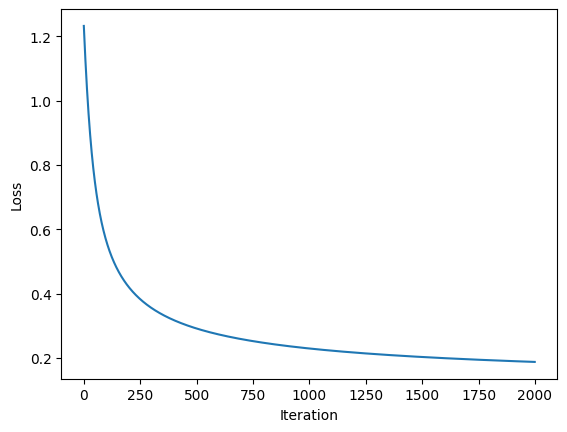

In [ ]:
# ========================================================
# Train your logistic regression model
# ========================================================
# In this cell, you will experiment with different values of
# `log_learning_rate` and `log_update_steps` to achieve
# a final cross-entropy loss below 0.2.
## ========================================================

# Initialize parameters (do not change)
np.random.seed(SEED)
log_weight = np.random.randn(NUM_CLASSES, N_FEATURES) * np.sqrt(1.0 / N_FEATURES)
log_bias = np.zeros(NUM_CLASSES)

##########################################
## TODO:
log_learning_rate = None
log_update_steps = None
##########################################

# Train the logistic regression model
new_log_weight, new_log_bias, losses = train_logistic_regression(
    flower_X, flower_y, log_weight, log_bias,
    log_learning_rate, log_update_steps)

# Display final loss and training curve
print(f"Final loss: {losses[-1]}")
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")

Run the function below to plot the predictions. Which samples are the models getting wrong?

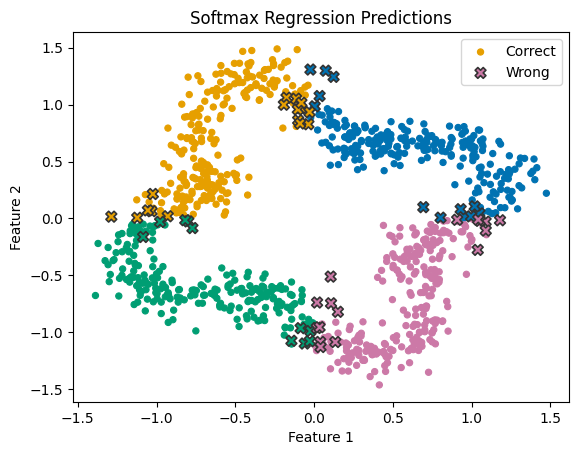

In [ ]:
# ========================================================
# DO NOT MODIFY THIS CODE CELL
# ========================================================

def plot_predictions(inputs: np.ndarray, targets: np.ndarray,
                     weight: np.ndarray, bias: np.ndarray):

  # Okabe–Ito colorblind-friendly palette (8 distinct colors)
  okabe_ito = np.array([
      "#0072B2",  # blue
      "#E69F00",  # orange
      "#009E73",  # green
      "#CC79A7",  # purple/magenta
      "#56B4E9",  # sky blue
      "#D55E00",  # vermillion
      "#F0E442",  # yellow
      "#000000",  # black
  ])

  fig, ax = plt.subplots()

  # Predicted class indices
  y_pred = np.argmax(logistic_reg_model(weight, bias, inputs), axis=1)

  # True labels (1D)
  t_true = targets.ravel()

  # Correct vs wrong mask
  correct_mask = (y_pred == t_true)

  # Assign a color per *predicted* class from the palette
  pred_colors = okabe_ito[y_pred % len(okabe_ito)]

  # Scatter: correct = circles with black edge
  ax.scatter(
      inputs[correct_mask, 0], inputs[correct_mask, 1],
      c=pred_colors[correct_mask],
      linewidths=0.8, marker="o", s=20,
      label="Correct"
  )

  # Scatter: wrong = X markers with dark edge (no red/green reliance)
  ax.scatter(
      inputs[~correct_mask, 0], inputs[~correct_mask, 1],
      c=pred_colors[~correct_mask],
      edgecolors="#333333", linewidths=1.2, marker="X", s=60,
      label="Wrong"
  )

  ax.set_title("Softmax Regression Predictions")
  ax.set_xlabel("Feature 1")
  ax.set_ylabel("Feature 2")
  ax.legend()
  plt.show()


plot_predictions(flower_X, flower_y, new_log_weight, new_log_bias)